# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

import requests
import json
import gmaps
from citipy import citipy

from api_keys import weather_api_key, g_key

## Generate Cities List

In [3]:
cities = []
for lat in range(-90, 90,3):
    for lng in range(-180, 180, 10):
        cities.append(citipy.nearest_city(lat, lng).city_name)
#number of cities selected
cities = list(set(cities))
n = len(cities)   
n

803

In [4]:
cities

['scarborough',
 'fortuna',
 'livingston',
 'fort-shevchenko',
 'pemba',
 'kumluca',
 'bonavista',
 'xining',
 'fevralsk',
 'midland',
 'chegutu',
 'maceio',
 'cumaribo',
 'moose factory',
 'kavaratti',
 'east london',
 'mitsukaido',
 'krasnoarmeysk',
 'guanare',
 'kavieng',
 'houma',
 'katsuura',
 'liepaja',
 'barkhan',
 'tanete',
 'acajutla',
 'madison',
 'beaverlodge',
 'coihaique',
 'ondorhaan',
 'clinton',
 'cape town',
 'gat',
 'hanyang',
 'kui buri',
 'gilazi',
 'vila velha',
 'mabaruma',
 'nishihara',
 'kissidougou',
 'mackay',
 'asfi',
 'palu',
 'nioro',
 'tiznit',
 'port hawkesbury',
 'kedrovyy',
 'mangai',
 'manoel urbano',
 'tulun',
 'portland',
 'los andes',
 'safford',
 'petropavlovsk-kamchatskiy',
 'dikson',
 'polunochnoye',
 'kamiiso',
 'carnarvon',
 'mataura',
 'vanimo',
 'bartica',
 'caramay',
 'qazvin',
 'porto-vecchio',
 'woodward',
 'barrow',
 'antofagasta',
 'morag',
 'merauke',
 'volchansk',
 'tura',
 'butaritari',
 'villa constitucion',
 'toliary',
 'kharovsk',


In [5]:
# # Retrieve cities' coordinate
# all_city_cords  ={}
# # d = citipy.WORLD_CITIES_DICT
# # for city in cities:
# #     for cord in d:
# #         if d[cord].city_name == city:
# #             city_cords[city] = cord

# for cord in d:
#     all_city_cords[d[cord].city_name] = cord

# city_lat_lng = {
#     'Cities':[],
#     'Lat':[],
#     'Lng':[],
#     'Country':[]
# }

# for city in cities:
#     city_lat_lng['Cities'].append(city)
#     lat = all_city_cords[city][0]
#     lng = all_city_cords[city][1]
#     city_lat_lng['Lat'].append(lat)
#     city_lat_lng['Lng'].append(lng)
#     city_lat_lng['Country'].append(citipy.nearest_city(lat, lng).country_code.upper())
# city_lat_lng = pd.DataFrame(city_lat_lng)
# city_lat_lng

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
date = []
avi_city = []
# base url
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&q="


print('Beginning Data Retrieval')
print('-------------------------------')

# let every 50 cities be a set:
i = 0
l = 50
for city in cities:
    # Build query URL
    query_url = url + city 
    #assemble url and make API request, then extract data
    try:
        set_num = math.floor(i / l) + 1
        print(f"Processing Record {(i % l) + 1} of Set {set_num} | {city} ")
        i += 1

        data = requests.get(query_url).json()

        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloud.append(data['clouds']['all'])
        wind.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        avi_city.append(data['name'])
    except Exception as e:
        print('City not found. Skipping ...')

    
print('-------------------------------')
print('Data Retrieval Complete')    
print('-------------------------------')    

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | scarborough 
Processing Record 2 of Set 1 | fortuna 
Processing Record 3 of Set 1 | livingston 
Processing Record 4 of Set 1 | fort-shevchenko 
Processing Record 5 of Set 1 | pemba 
Processing Record 6 of Set 1 | kumluca 
Processing Record 7 of Set 1 | bonavista 
Processing Record 8 of Set 1 | xining 
Processing Record 9 of Set 1 | fevralsk 
City not found. Skipping ...
Processing Record 10 of Set 1 | midland 
Processing Record 11 of Set 1 | chegutu 
Processing Record 12 of Set 1 | maceio 
Processing Record 13 of Set 1 | cumaribo 
City not found. Skipping ...
Processing Record 14 of Set 1 | moose factory 
Processing Record 15 of Set 1 | kavaratti 
Processing Record 16 of Set 1 | east london 
Processing Record 17 of Set 1 | mitsukaido 
Processing Record 18 of Set 1 | krasnoarmeysk 
Processing Record 19 of Set 1 | guanare 
Processing Record 20 of Set 1 | kavieng 
Processing Record 21 of Set 1 | houma 

Processing Record 34 of Set 4 | jiaonan 
Processing Record 35 of Set 4 | rundu 
Processing Record 36 of Set 4 | bantry 
Processing Record 37 of Set 4 | poum 
Processing Record 38 of Set 4 | kidal 
Processing Record 39 of Set 4 | pierre 
Processing Record 40 of Set 4 | punta arenas 
Processing Record 41 of Set 4 | puerto ayora 
Processing Record 42 of Set 4 | barcelona 
Processing Record 43 of Set 4 | curaca 
Processing Record 44 of Set 4 | thunder bay 
Processing Record 45 of Set 4 | manaus 
Processing Record 46 of Set 4 | carballo 
Processing Record 47 of Set 4 | raduzhnyy 
Processing Record 48 of Set 4 | lasa 
Processing Record 49 of Set 4 | yanan 
City not found. Skipping ...
Processing Record 50 of Set 4 | tunceli 
Processing Record 1 of Set 5 | yuza 
Processing Record 2 of Set 5 | doembang nangbuat 
Processing Record 3 of Set 5 | mangit 
Processing Record 4 of Set 5 | hongjiang 
Processing Record 5 of Set 5 | malwan 
City not found. Skipping ...
Processing Record 6 of Set 5 | merr

Processing Record 16 of Set 8 | olmos 
Processing Record 17 of Set 8 | skagastrond 
City not found. Skipping ...
Processing Record 18 of Set 8 | batsfjord 
Processing Record 19 of Set 8 | wanning 
Processing Record 20 of Set 8 | azangaro 
Processing Record 21 of Set 8 | bada 
Processing Record 22 of Set 8 | copiapo 
Processing Record 23 of Set 8 | mashhad 
Processing Record 24 of Set 8 | illoqqortoormiut 
City not found. Skipping ...
Processing Record 25 of Set 8 | souillac 
Processing Record 26 of Set 8 | benguela 
Processing Record 27 of Set 8 | waingapu 
Processing Record 28 of Set 8 | vaini 
Processing Record 29 of Set 8 | ranfurly 
Processing Record 30 of Set 8 | bowen 
Processing Record 31 of Set 8 | azare 
Processing Record 32 of Set 8 | harqalah 
Processing Record 33 of Set 8 | ivankiv 
Processing Record 34 of Set 8 | comodoro rivadavia 
Processing Record 35 of Set 8 | raudeberg 
Processing Record 36 of Set 8 | nizhneyansk 
City not found. Skipping ...
Processing Record 37 of S

Processing Record 3 of Set 12 | goderich 
Processing Record 4 of Set 12 | aklavik 
Processing Record 5 of Set 12 | avarua 
Processing Record 6 of Set 12 | guarapari 
Processing Record 7 of Set 12 | skjervoy 
Processing Record 8 of Set 12 | saint-augustin 
Processing Record 9 of Set 12 | ketchikan 
Processing Record 10 of Set 12 | urzhum 
Processing Record 11 of Set 12 | moerai 
Processing Record 12 of Set 12 | tsogni 
Processing Record 13 of Set 12 | gornopravdinsk 
Processing Record 14 of Set 12 | ixtapa 
Processing Record 15 of Set 12 | dingle 
Processing Record 16 of Set 12 | quatre cocos 
Processing Record 17 of Set 12 | iranshahr 
Processing Record 18 of Set 12 | moche 
Processing Record 19 of Set 12 | yulara 
Processing Record 20 of Set 12 | akropong 
Processing Record 21 of Set 12 | sovetskaya gavan 
Processing Record 22 of Set 12 | calvinia 
Processing Record 23 of Set 12 | north platte 
Processing Record 24 of Set 12 | talnakh 
Processing Record 25 of Set 12 | belushya guba 
C

Processing Record 31 of Set 15 | qaanaaq 
Processing Record 32 of Set 15 | tuatapere 
Processing Record 33 of Set 15 | grimari 
City not found. Skipping ...
Processing Record 34 of Set 15 | abu samrah 
Processing Record 35 of Set 15 | green river 
Processing Record 36 of Set 15 | mogocha 
Processing Record 37 of Set 15 | grand centre 
City not found. Skipping ...
Processing Record 38 of Set 15 | batagay-alyta 
Processing Record 39 of Set 15 | port blair 
Processing Record 40 of Set 15 | dalby 
Processing Record 41 of Set 15 | cidreira 
Processing Record 42 of Set 15 | ruteng 
Processing Record 43 of Set 15 | kieta 
Processing Record 44 of Set 15 | lisiy nos 
Processing Record 45 of Set 15 | pervouralsk 
Processing Record 46 of Set 15 | torbay 
Processing Record 47 of Set 15 | bajos de haina 
Processing Record 48 of Set 15 | weligama 
Processing Record 49 of Set 15 | san cristobal 
Processing Record 50 of Set 15 | shiyan 
Processing Record 1 of Set 16 | kruisfontein 
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame({'City': avi_city, 'Lat':lat, 'Lng':lng, 'Max Temp':max_temp,
                   'Humidity':humidity, 'Cloudiness':cloud, 'Wind Speed':wind,
                   'Country':country, 'Date':date})
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Scarborough,54.2797,-0.4044,288.45,88,97,3.01,GB,1627270744
1,Fortuna,40.5982,-124.1573,286.44,92,90,3.09,US,1627270744
2,Livingston,55.9029,-3.5226,289.38,93,90,1.03,GB,1627270744
3,Fort-Shevchenko,44.5086,50.2630,302.44,47,2,7.82,KZ,1627270744
4,Pemba,-12.9740,40.5178,291.54,88,20,3.60,MZ,1627270606


In [8]:
df.to_csv('../output_data/city_weather_records.csv',index=False)

In [9]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,7.370000e+02
mean,19.970927,17.450240,294.715753,69.544098,52.971506,3.392673,1.627271e+09
std,32.043258,87.749011,7.613642,20.701778,38.493231,2.408369,8.606860e+01
min,-54.800000,-179.166700,270.010000,12.000000,0.000000,0.000000,1.627270e+09
25%,-5.984700,-60.379700,289.300000,56.000000,11.000000,1.560000,1.627271e+09
50%,22.890900,20.391600,295.680000,74.000000,57.000000,2.810000,1.627271e+09
75%,47.657500,95.321400,300.760000,87.000000,91.000000,4.630000,1.627271e+09
max,78.218600,173.166700,308.750000,100.000000,100.000000,11.830000,1.627271e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
df[df['Humidity']>100] #no records that have humidity >100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
df[df['Humidity']>100].index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df.drop(df[df['Humidity']>100].index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Scarborough,54.2797,-0.4044,288.45,88,97,3.01,GB,1627270744
1,Fortuna,40.5982,-124.1573,286.44,92,90,3.09,US,1627270744
2,Livingston,55.9029,-3.5226,289.38,93,90,1.03,GB,1627270744
3,Fort-Shevchenko,44.5086,50.2630,302.44,47,2,7.82,KZ,1627270744
4,Pemba,-12.9740,40.5178,291.54,88,20,3.60,MZ,1627270606


In [13]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,7.370000e+02
mean,19.970927,17.450240,294.715753,69.544098,52.971506,3.392673,1.627271e+09
std,32.043258,87.749011,7.613642,20.701778,38.493231,2.408369,8.606860e+01
min,-54.800000,-179.166700,270.010000,12.000000,0.000000,0.000000,1.627270e+09
25%,-5.984700,-60.379700,289.300000,56.000000,11.000000,1.560000,1.627271e+09
50%,22.890900,20.391600,295.680000,74.000000,57.000000,2.810000,1.627271e+09
75%,47.657500,95.321400,300.760000,87.000000,91.000000,4.630000,1.627271e+09
max,78.218600,173.166700,308.750000,100.000000,100.000000,11.830000,1.627271e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [14]:
from datetime import datetime
ts = int('1627230664')
date = datetime.utcfromtimestamp(ts).strftime('%Y/%m/%d')

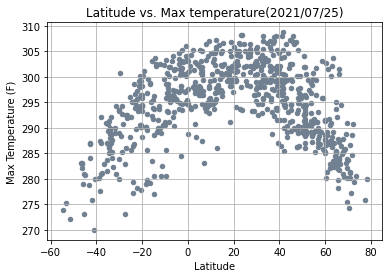

<Figure size 432x288 with 0 Axes>

In [15]:
df.plot.scatter(x='Lat', y='Max Temp', c='slategrey',
               title=f'Latitude vs. Max temperature({date})',
               xlabel='Latitude',
               ylabel='Max Temperature (F)',
               grid=True)
plt.show()
plt.savefig('../output_data/max_temp.png')

## Latitude vs. Humidity Plot

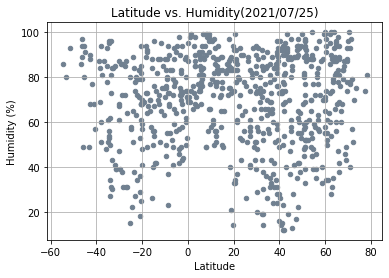

<Figure size 432x288 with 0 Axes>

In [16]:
df.plot.scatter(x='Lat', y='Humidity', c='slategrey',
               title=f'Latitude vs. Humidity({date})',
               xlabel='Latitude',
               ylabel='Humidity (%)',
               grid=True)
plt.show()
plt.savefig('../output_data/humidity.png')

## Latitude vs. Cloudiness Plot

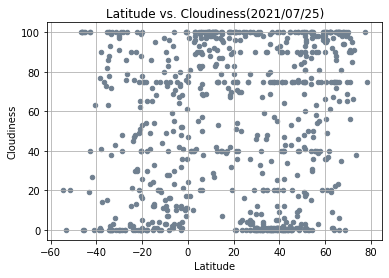

<Figure size 432x288 with 0 Axes>

In [29]:
# date = 
df.plot.scatter(x='Lat', y='Cloudiness', c='slategrey',
               title=f'Latitude vs. Cloudiness({date})',
               xlabel='Latitude',
               ylabel='Cloudiness',
               grid=True)

plt.show()
plt.savefig('../output_data/Cloudiness.png')

## Latitude vs. Wind Speed Plot

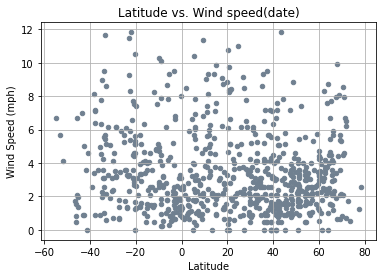

<Figure size 432x288 with 0 Axes>

In [18]:
df.plot.scatter(x='Lat', y='Wind Speed', c='slategrey',
               title=f'Latitude vs. Wind speed(date)',
               xlabel='Latitude',
               ylabel='Wind Speed (mph)',
               grid=True)
plt.show()
plt.savefig('../output_data/wind_speed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6038983750125062


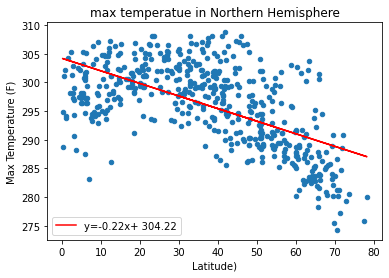

<Figure size 432x288 with 0 Axes>

In [27]:
north_h = df[df['Lat']>0]
north_h.plot.scatter(x='Lat', y='Max Temp', title='max temperatue in Northern Hemisphere')
res = sts.linregress(north_h['Lat'], north_h['Max Temp']) 
print(f'The r-value is: {res.rvalue}')
plt.plot(north_h['Lat'], res.intercept + res.slope*north_h['Lat'], 
         'r', label=f"y={res.slope: .2f}x+{res.intercept: .2f}")

plt.xlabel('Latitude)')
plt.ylabel('Max Temperature (F)')
plt.legend(loc=3)
plt.show()
plt.savefig('../output_data/north_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6918557030645563


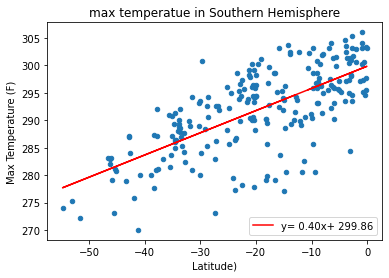

<Figure size 432x288 with 0 Axes>

In [20]:
south_h = df[df['Lat']<0]
south_h.plot.scatter(x='Lat', y='Max Temp', title='max temperatue in Southern Hemisphere')
south_res = sts.linregress(south_h['Lat'], south_h['Max Temp']) 
print(f'The r-value is: {south_res.rvalue}')
plt.plot(south_h['Lat'], south_res.intercept + south_res.slope*south_h['Lat'], 
         'r', label=f"y={south_res.slope: .2f}x+{south_res.intercept: .2f}")

plt.xlabel('Latitude)')
plt.ylabel('Max Temperature (F)')
plt.legend(loc=4)
plt.show()
plt.savefig('../output_data/southern_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.09216559918133797


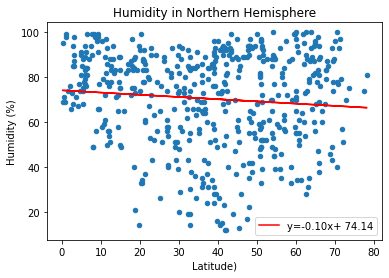

<Figure size 432x288 with 0 Axes>

In [21]:
north_h.plot.scatter(x='Lat', y='Humidity', title='Humidity in Northern Hemisphere')
res = sts.linregress(north_h['Lat'], north_h['Humidity']) 
print(f'The r-value is: {res.rvalue}')
plt.plot(north_h['Lat'], res.intercept + res.slope*north_h['Lat'], 
         'r', label=f"y={res.slope: .2f}x+{res.intercept: .2f}")

plt.xlabel('Latitude)')
plt.ylabel('Humidity (%)')
plt.legend(loc=4)
plt.show()
plt.savefig('../output_data/northern_humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.023938687384358382


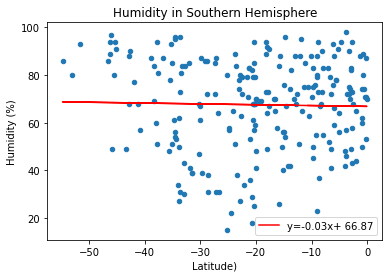

<Figure size 432x288 with 0 Axes>

In [22]:
south_h.plot.scatter(x='Lat', y='Humidity', title='Humidity in Southern Hemisphere')
south_res = sts.linregress(south_h['Lat'], south_h['Humidity']) 
print(f'The r-value is: {south_res.rvalue}')
plt.plot(south_h['Lat'], south_res.intercept + south_res.slope*south_h['Lat'], 
         'r', label=f"y={south_res.slope: .2f}x+{south_res.intercept: .2f}")

plt.xlabel('Latitude)')
plt.ylabel('Humidity (%)')
plt.legend(loc=4)
plt.show()
plt.savefig('../output_data/southern_humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.04020682172849836


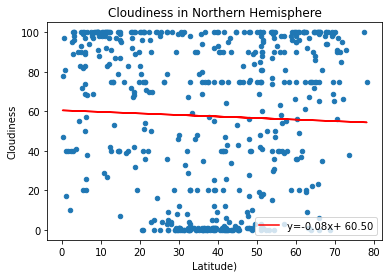

<Figure size 432x288 with 0 Axes>

In [23]:
north_h.plot.scatter(x='Lat', y='Cloudiness', title='Cloudiness in Northern Hemisphere')
res = sts.linregress(north_h['Lat'], north_h['Cloudiness']) 
print(f'The r-value is: {res.rvalue}')
plt.plot(north_h['Lat'], res.intercept + res.slope*north_h['Lat'], 
         'r', label=f"y={res.slope: .2f}x+{res.intercept: .2f}")

plt.xlabel('Latitude)')
plt.ylabel('Cloudiness')
plt.legend(loc=4)
plt.show()
plt.savefig('../output_data/northern_cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0875064135325952


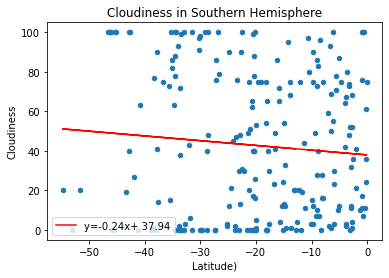

<Figure size 432x288 with 0 Axes>

In [24]:
south_h.plot.scatter(x='Lat', y='Cloudiness', title='Cloudiness in Southern Hemisphere')
south_res = sts.linregress(south_h['Lat'], south_h['Cloudiness']) 
print(f'The r-value is: {south_res.rvalue}')
plt.plot(south_h['Lat'], south_res.intercept + south_res.slope*south_h['Lat'], 
         'r', label=f"y={south_res.slope: .2f}x+{south_res.intercept: .2f}")

plt.xlabel('Latitude)')
plt.ylabel('Cloudiness')
plt.legend(loc=3)
plt.show()
plt.savefig('../output_data/southern_Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.05547982910022272


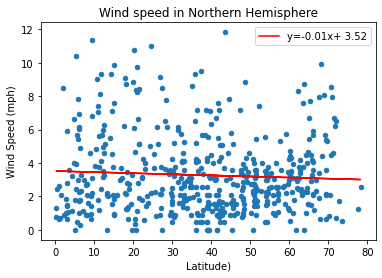

<Figure size 432x288 with 0 Axes>

In [28]:
north_h.plot.scatter(x='Lat', y='Wind Speed', title='Wind speed in Northern Hemisphere')
res = sts.linregress(north_h['Lat'], north_h['Wind Speed']) 
print(f'The r-value is: {res.rvalue}')
plt.plot(north_h['Lat'], res.intercept + res.slope*north_h['Lat'], 
         'r', label=f"y={res.slope: .2f}x+{res.intercept: .2f}")

plt.xlabel('Latitude)')
plt.ylabel('Wind Speed (mph)')
plt.legend(loc=1)
plt.show()
plt.savefig('../output_data/northern_Wind_Speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1542637992439025


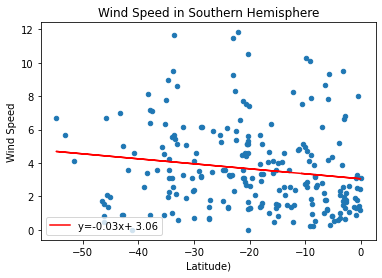

<Figure size 432x288 with 0 Axes>

In [26]:
south_h.plot.scatter(x='Lat', y='Wind Speed', title='Wind Speed in Southern Hemisphere')
south_res = sts.linregress(south_h['Lat'], south_h['Wind Speed']) 
print(f'The r-value is: {south_res.rvalue}')
plt.plot(south_h['Lat'], south_res.intercept + south_res.slope*south_h['Lat'], 
         'r', label=f"y={south_res.slope: .2f}x+{south_res.intercept: .2f}")

plt.xlabel('Latitude)')
plt.ylabel('Wind Speed')
plt.legend(loc=3)
plt.show()
plt.savefig('../output_data/southern_Wind_Speed.png')